# Packages

In [ ]:
pip install  import_ipynb

In [2]:
pip install ndlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from math import *
import pandas as pd
import import_ipynb 
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

from TOPSIS import Topsis

importing Jupyter notebook from TOPSIS.ipynb


Graph with 115 nodes and 613 edges


C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\697226210.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


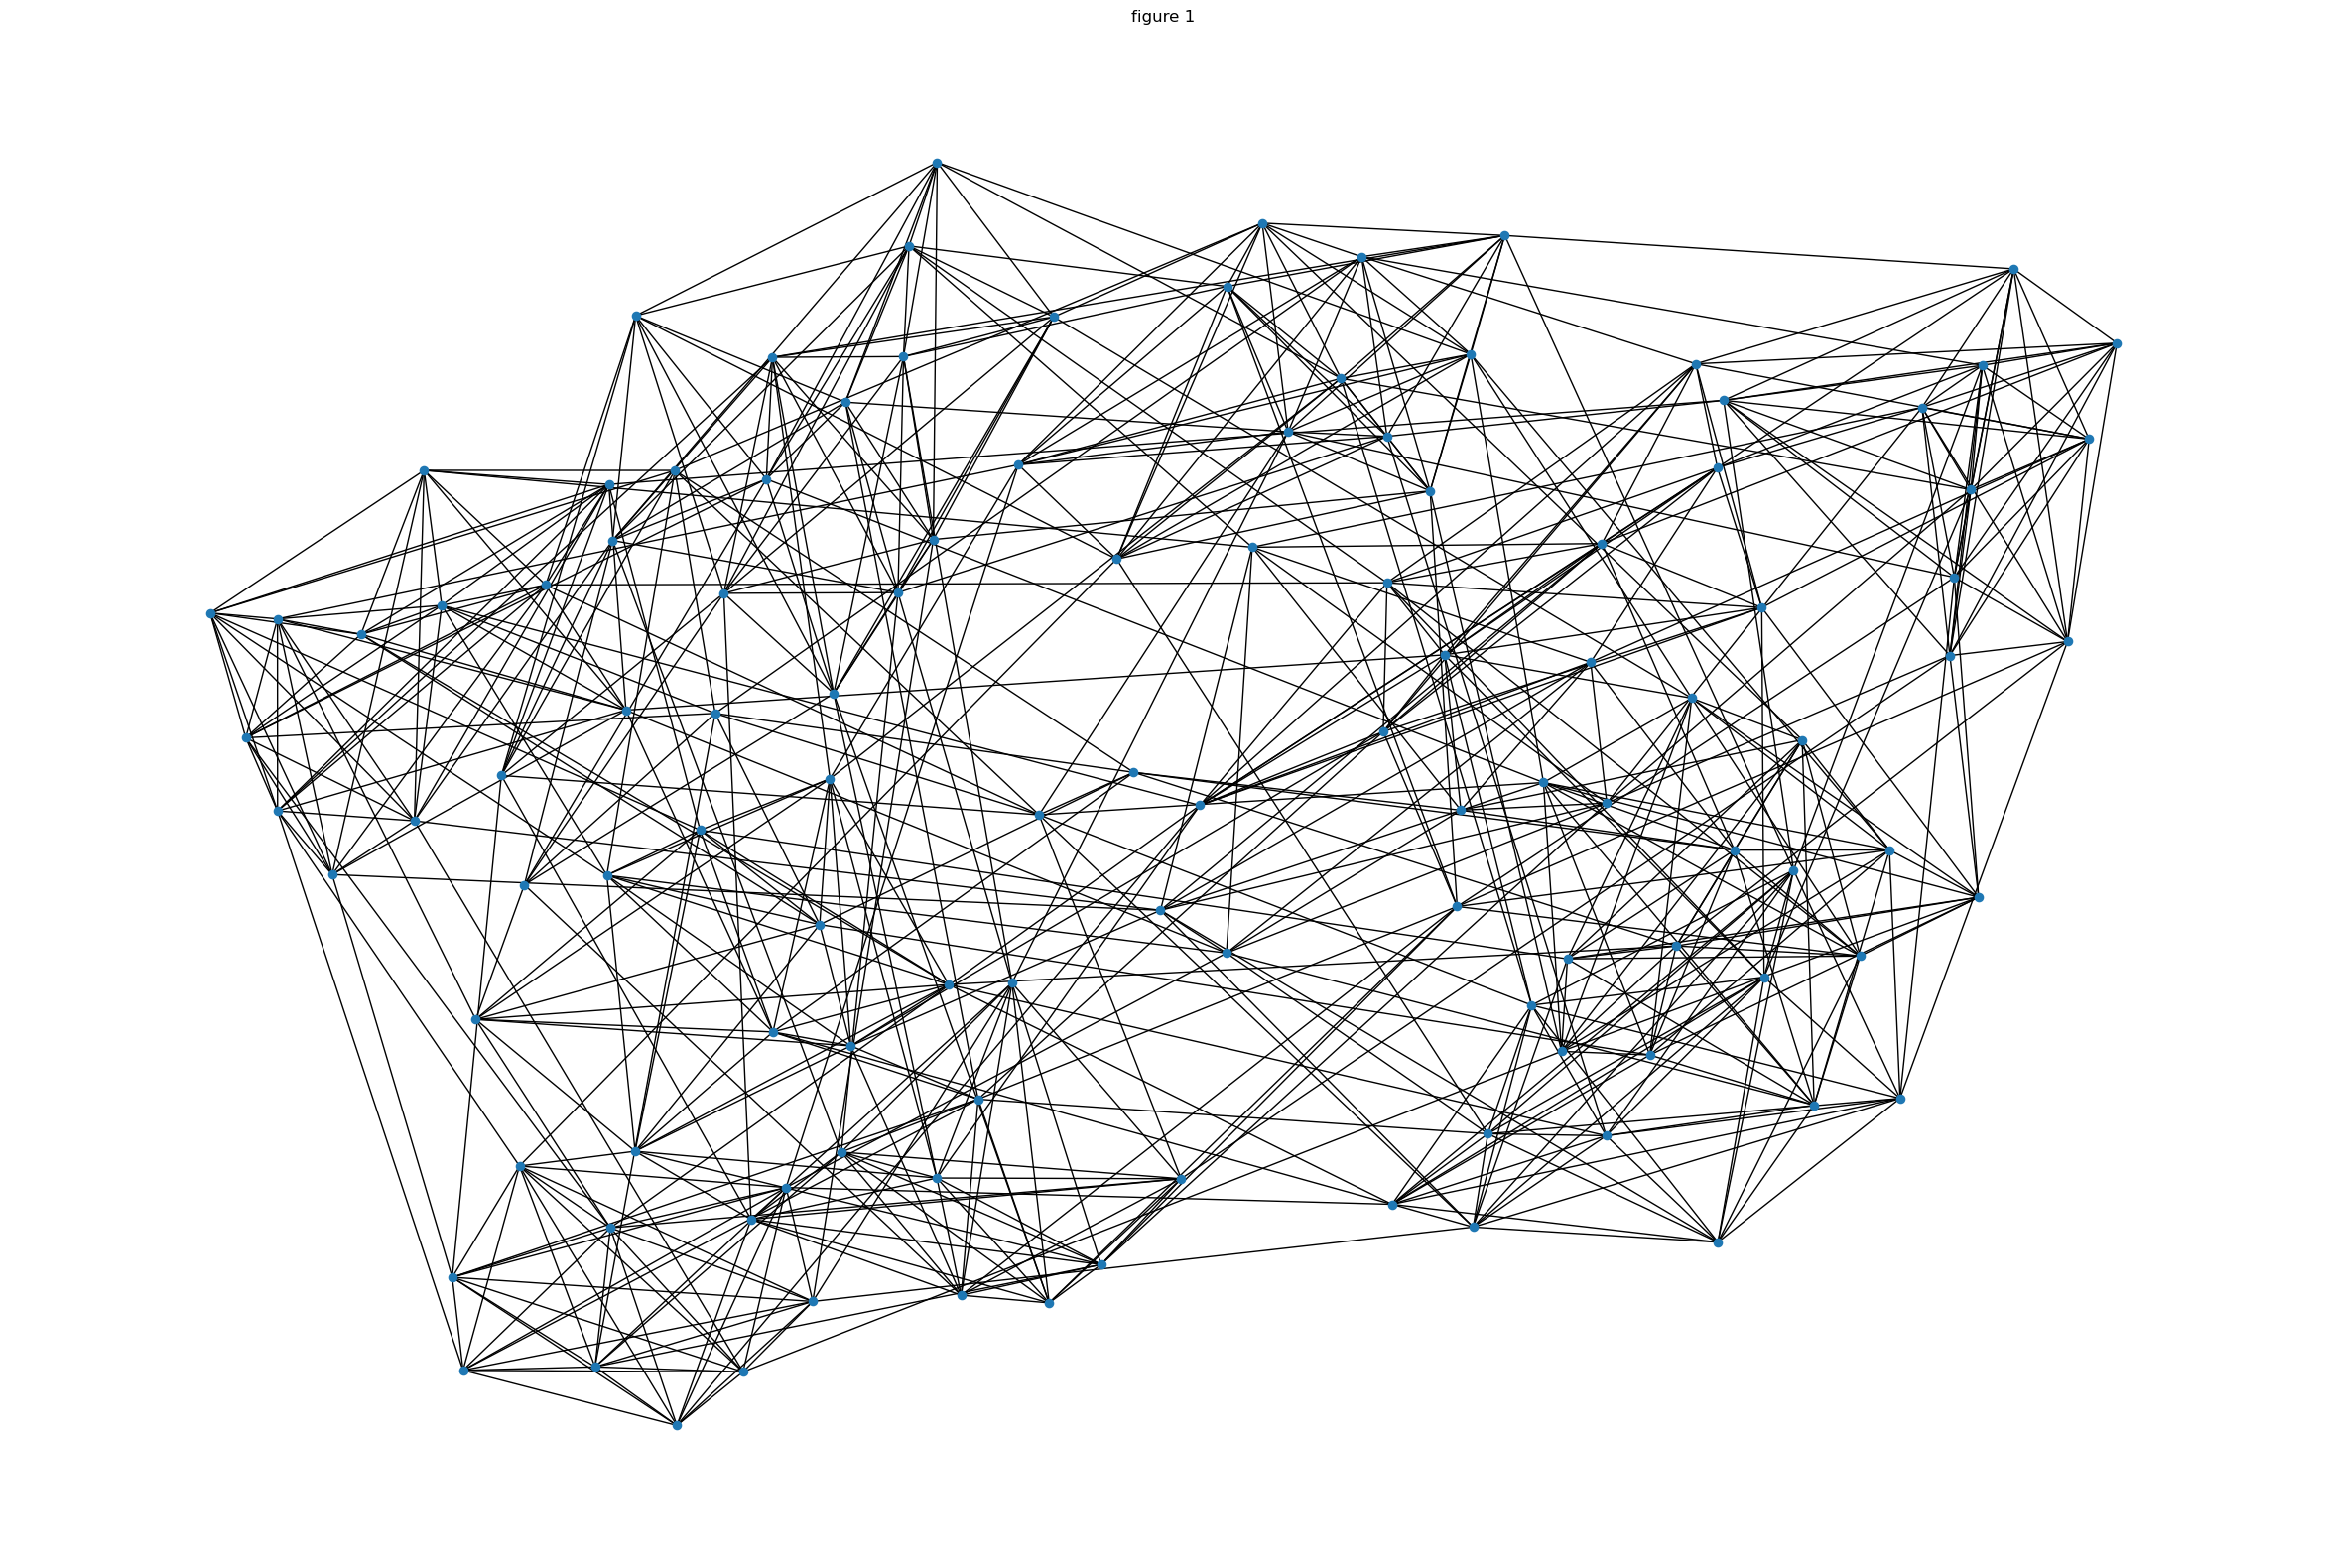

In [4]:
# Read facebook dataset
plt.figure(figsize=(30,20))
G=nx.read_edgelist('Data/football.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)
print(nx.info(G))
nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [5]:
# Centrality measures
deg_centrality = nx.degree_centrality(G)
close_centrality = nx.closeness_centrality(G)
bet_centrality = nx.betweenness_centrality(G)
eig_centrality=nx.eigenvector_centrality(G)

In [6]:
Matrix=pd.DataFrame()#create dataframe
for noued in G:
    #add the name of each node with its measures centrality
    Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued], 'EC':eig_centrality[noued]},ignore_index=True)
print(Matrix)
Matrix.to_csv("Data/Matrix.csv" ,index=False)

C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghr

    Node w_Node        DC        BC        CC        EC
0      1      1  0.105263  0.032490  0.423792  0.106503
1      2      2  0.105263  0.017621  0.413043  0.096385
2      3      3  0.096491  0.010664  0.402827  0.101190
3      4      4  0.096491  0.011831  0.397213  0.106532
4      5      5  0.096491  0.022213  0.423792  0.103791
..   ...    ...       ...       ...       ...       ...
110  111    111  0.096491  0.017789  0.410072  0.092508
111  112    112  0.096491  0.012378  0.410072  0.087907
112  113    113  0.087719  0.011582  0.395833  0.073015
113  114    114  0.096491  0.006637  0.394464  0.116471
114  115    115  0.105263  0.020079  0.430189  0.121289

[115 rows x 6 columns]


C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
C:\Users\wail_maghrane\AppData\Local\Temp\ipykernel_17884\3912402994.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],


In [7]:
Matrix = pd.read_csv("Data/Matrix.csv")

In [8]:
Matrix_arr= Matrix[['DC','BC','CC','EC']].to_numpy()

Matrix_arr

array([[0.10526316, 0.03248995, 0.42379182, 0.10650323],
       [0.10526316, 0.01762111, 0.41304348, 0.09638543],
       [0.09649123, 0.01066387, 0.40282686, 0.10119023],
       [0.09649123, 0.01183115, 0.39721254, 0.10653183],
       [0.09649123, 0.02221345, 0.42379182, 0.10379099],
       [0.09649123, 0.00758934, 0.38513514, 0.10448168],
       [0.0877193 , 0.0073543 , 0.3877551 , 0.08336777],
       [0.09649123, 0.01547555, 0.39721254, 0.08845986],
       [0.0877193 , 0.00643856, 0.39583333, 0.09913706],
       [0.09649123, 0.01009534, 0.39583333, 0.08141806],
       [0.07894737, 0.00861987, 0.39175258, 0.07559668],
       [0.0877193 , 0.01395293, 0.40860215, 0.09410449],
       [0.10526316, 0.01881941, 0.42222222, 0.11370348],
       [0.09649123, 0.01778327, 0.41304348, 0.09337865],
       [0.09649123, 0.01066026, 0.38255034, 0.07951283],
       [0.09649123, 0.0091307 , 0.39446367, 0.08603422],
       [0.09649123, 0.01144318, 0.39721254, 0.09054271],
       [0.0877193 , 0.01037998,

# Application Entropie

In [9]:
#ev_matrix_np 
m = 115
ev_matrix_np = Matrix_arr
sum = np.zeros(4)

for i in range(m):
  for j in range(4):
    sum[j] += ev_matrix_np[i][j]

p = np.copy(ev_matrix_np)

for i in range(m):
  for j in range(4):
    p[i][j] = ev_matrix_np[i][j]/sum[j]


p

array([[0.00978793, 0.02116809, 0.00922858, 0.01009208],
       [0.00978793, 0.01148064, 0.00899452, 0.00913333],
       [0.00897227, 0.0069478 , 0.00877204, 0.00958863],
       [0.00897227, 0.00770832, 0.00864978, 0.01009479],
       [0.00897227, 0.01447267, 0.00922858, 0.00983507],
       [0.00897227, 0.00494466, 0.00838678, 0.00990052],
       [0.00815661, 0.00479153, 0.00844383, 0.0078998 ],
       [0.00897227, 0.01008275, 0.00864978, 0.00838232],
       [0.00815661, 0.0041949 , 0.00861975, 0.00939407],
       [0.00897227, 0.00657739, 0.00861975, 0.00771505],
       [0.00734095, 0.00561608, 0.00853088, 0.00716342],
       [0.00815661, 0.00909072, 0.0088978 , 0.0089172 ],
       [0.00978793, 0.01226136, 0.0091944 , 0.01077436],
       [0.00897227, 0.01158629, 0.00899452, 0.00884842],
       [0.00897227, 0.00694545, 0.00833049, 0.00753451],
       [0.00897227, 0.0059489 , 0.00858992, 0.00815247],
       [0.00897227, 0.00745554, 0.00864978, 0.00857969],
       [0.00815661, 0.00676284,

In [10]:
k = 1/log(m)
E = []
plnp = []


for j in range(4):
  temp_sum = 0
  for i in range(m):
    try:
       pij = p[i][j]
       temp_sum += pij*log(pij)
    except:
      pij = 1
      temp_sum += pij*log(pij)
  E.append(-k*temp_sum)

E

[0.9992439155242702,
 0.9799297550097854,
 0.9998369974767316,
 0.9965095568300055]

In [11]:
D = []
for i in range(4):
  D.append(1-E[i])
D

[0.0007560844757298346,
 0.020070244990214592,
 0.00016300252326839626,
 0.0034904431699944727]

In [12]:
sm = np.sum(D)
weights = [D[i]/sm for i in range(4)]
weights

[0.030886087425744075,
 0.81987047918885,
 0.006658660964338474,
 0.14258477242106746]

# W_Topsis

In [13]:
# Decision Matrix for w_topsis
Evaluation_matrix = Matrix_arr
criteria = np.array([True,True,True,True])

w_T = Topsis(Evaluation_matrix,weights,criteria)
w_T.calc()

Step 1
 [[0.10526316 0.03248995 0.42379182 0.10650323]
 [0.10526316 0.01762111 0.41304348 0.09638543]
 [0.09649123 0.01066387 0.40282686 0.10119023]
 [0.09649123 0.01183115 0.39721254 0.10653183]
 [0.09649123 0.02221345 0.42379182 0.10379099]
 [0.09649123 0.00758934 0.38513514 0.10448168]
 [0.0877193  0.0073543  0.3877551  0.08336777]
 [0.09649123 0.01547555 0.39721254 0.08845986]
 [0.0877193  0.00643856 0.39583333 0.09913706]
 [0.09649123 0.01009534 0.39583333 0.08141806]
 [0.07894737 0.00861987 0.39175258 0.07559668]
 [0.0877193  0.01395293 0.40860215 0.09410449]
 [0.10526316 0.01881941 0.42222222 0.11370348]
 [0.09649123 0.01778327 0.41304348 0.09337865]
 [0.09649123 0.01066026 0.38255034 0.07951283]
 [0.09649123 0.0091307  0.39446367 0.08603422]
 [0.09649123 0.01144318 0.39721254 0.09054271]
 [0.0877193  0.01037998 0.39721254 0.07561031]
 [0.09649123 0.01715729 0.40425532 0.09147166]
 [0.0877193  0.01828734 0.40425532 0.08171522]
 [0.0877193  0.01353627 0.39041096 0.08174546]
 [0.0

# Topsis

In [14]:
Evaluation_matrix = Matrix_arr
criteria = np.array([True,True,True,True])
weights = [0.1,0.1,0.4,0.4]

T = Topsis(Evaluation_matrix,weights,criteria)
T.calc()

Step 1
 [[0.10526316 0.03248995 0.42379182 0.10650323]
 [0.10526316 0.01762111 0.41304348 0.09638543]
 [0.09649123 0.01066387 0.40282686 0.10119023]
 [0.09649123 0.01183115 0.39721254 0.10653183]
 [0.09649123 0.02221345 0.42379182 0.10379099]
 [0.09649123 0.00758934 0.38513514 0.10448168]
 [0.0877193  0.0073543  0.3877551  0.08336777]
 [0.09649123 0.01547555 0.39721254 0.08845986]
 [0.0877193  0.00643856 0.39583333 0.09913706]
 [0.09649123 0.01009534 0.39583333 0.08141806]
 [0.07894737 0.00861987 0.39175258 0.07559668]
 [0.0877193  0.01395293 0.40860215 0.09410449]
 [0.10526316 0.01881941 0.42222222 0.11370348]
 [0.09649123 0.01778327 0.41304348 0.09337865]
 [0.09649123 0.01066026 0.38255034 0.07951283]
 [0.09649123 0.0091307  0.39446367 0.08603422]
 [0.09649123 0.01144318 0.39721254 0.09054271]
 [0.0877193  0.01037998 0.39721254 0.07561031]
 [0.09649123 0.01715729 0.40425532 0.09147166]
 [0.0877193  0.01828734 0.40425532 0.08171522]
 [0.0877193  0.01353627 0.39041096 0.08174546]
 [0.0

In [15]:
# S+ and S-
print("best_distance\t", T.best_distance)
print("worst_distance\t", T.worst_distance)

best_distance	 [0.00858403 0.01626588 0.01832344 0.01665748 0.01206895 0.01959059
 0.02483626 0.01982751 0.02113074 0.02410785 0.0266634  0.01860748
 0.01100624 0.01717007 0.02470532 0.02315197 0.02082076 0.02585513
 0.01813315 0.02109137 0.02284724 0.0265695  0.02291961 0.01406785
 0.01096705 0.01069214 0.0136212  0.02698008 0.00933426 0.01403664
 0.01577696 0.01210795 0.01554889 0.01792937 0.01658211 0.0123613
 0.01845074 0.02404283 0.02534646 0.01632856 0.02094519 0.0197231
 0.01735939 0.0201332  0.0190599  0.02529881 0.01656911 0.02357306
 0.02328552 0.03164693 0.01825065 0.02103403 0.01284387 0.0142511
 0.01752626 0.02127995 0.02923093 0.02109757 0.01083997 0.01955867
 0.01668299 0.0172141  0.01607321 0.02121706 0.0108281  0.01857625
 0.01566284 0.02074603 0.02498104 0.02749893 0.02144422 0.02694119
 0.02666828 0.03177897 0.01986627 0.02506668 0.01345139 0.02865965
 0.02475244 0.02675591 0.01638934 0.01555993 0.01423942 0.02002496
 0.02228664 0.02162148 0.02758391 0.02802642 0.029

In [16]:
# S+ and S-
print("best_distance\t", w_T.best_distance)
print("worst_distance\t", w_T.worst_distance)

best_distance	 [0.00623316 0.08330464 0.11961654 0.11349459 0.05927549 0.13567045
 0.13700543 0.09456765 0.14170543 0.12270651 0.13045642 0.10247513
 0.07694628 0.08248287 0.11977286 0.12771024 0.11560413 0.12126944
 0.08576583 0.07997295 0.10474643 0.15259076 0.12860885 0.10671562
 0.05478375 0.07244557 0.08496563 0.13851406 0.0660881  0.09638605
 0.09589906 0.06890679 0.09019756 0.12218575 0.11375654 0.06822125
 0.11962657 0.1159083  0.08679444 0.10226737 0.12390499 0.02558369
 0.11518683 0.13649854 0.09219537 0.08072728 0.04941335 0.1596575
 0.13929512 0.12141449 0.10148192 0.12125217 0.09917722 0.09756758
 0.11939551 0.11409737 0.13357773 0.14914852 0.05968395 0.14013127
 0.11909719 0.13287491 0.11311968 0.14647138 0.00382621 0.13603441
 0.09744453 0.06742903 0.10046239 0.12254062 0.0887548  0.13112054
 0.13354478 0.10676039 0.0441493  0.1045058  0.10019608 0.15506186
 0.10984938 0.1281447  0.05097841 0.121748   0.11356326 0.05522234
 0.10128804 0.10126428 0.13929517 0.13923497 0.1

In [17]:
print("worst_similarity\t", T.worst_similarity)
print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())

worst_similarity	 [0.78276611 0.58034695 0.55063928 0.59571074 0.68628703 0.54118227
 0.37447766 0.48532079 0.49821455 0.38260568 0.31285912 0.5232443
 0.72540684 0.55438318 0.36337489 0.41481861 0.47066136 0.33154215
 0.5286585  0.45187444 0.40524245 0.34593834 0.42277885 0.6711022
 0.71520073 0.73085603 0.6545702  0.31244709 0.76576535 0.65414716
 0.6003616  0.68767795 0.60249328 0.56766452 0.59751404 0.68119675
 0.55191283 0.37914854 0.34958671 0.59093416 0.47520721 0.52874012
 0.57442037 0.5242542  0.50454054 0.35774359 0.57506116 0.47388558
 0.42696607 0.19136807 0.53462771 0.46927768 0.70385444 0.64832034
 0.57535949 0.45608051 0.24476675 0.53317515 0.72108218 0.5629586
 0.606571   0.62892987 0.61637523 0.51747737 0.7319672  0.58040908
 0.60687474 0.47074703 0.35023876 0.28681464 0.44494399 0.30910566
 0.31946596 0.21126983 0.50164408 0.35071522 0.67843418 0.28732552
 0.35576664 0.30920685 0.5789983  0.64986936 0.69750527 0.48976692
 0.42109852 0.4409388  0.29570407 0.28279765 0.

In [18]:
print("worst_similarity\t", w_T.worst_similarity)
print("rank_to_worst_similarity\t", w_T.rank_to_worst_similarity())

worst_similarity	 [0.96119329 0.4795068  0.25420926 0.29244783 0.62958983 0.15720493
 0.14539682 0.40908801 0.12035673 0.2335812  0.18508934 0.35993594
 0.51960204 0.48458199 0.25174437 0.2028864  0.27817279 0.24227562
 0.46406555 0.5002564  0.34545526 0.05367243 0.19745224 0.33518927
 0.6576655  0.54760183 0.46938631 0.13535865 0.58731511 0.39857611
 0.40118364 0.56950044 0.43663508 0.23878858 0.29083016 0.57375414
 0.25429542 0.27580183 0.45776018 0.36166218 0.22694657 0.8407439
 0.28171232 0.15177487 0.42391081 0.49575849 0.69131295 0.04517859
 0.13259186 0.24136434 0.36621293 0.24322373 0.38209856 0.39119473
 0.25590833 0.28743576 0.16535285 0.08319319 0.62710779 0.13269645
 0.25842587 0.17733904 0.29510653 0.0953911  0.97661486 0.15664233
 0.39168346 0.57874875 0.37219243 0.23425587 0.44535669 0.18100487
 0.16609059 0.33323706 0.72445198 0.34693344 0.37530617 0.03852532
 0.31354328 0.19946639 0.68151208 0.24335737 0.29464104 0.65512181
 0.36706553 0.36723002 0.1303701  0.13064984 

In [19]:
print("best_similarity\t", T.best_similarity)
print("rank_to_best_similarity\t", T.rank_to_best_similarity())

best_similarity	 [0.21723389 0.41965305 0.44936072 0.40428926 0.31371297 0.45881773
 0.62552234 0.51467921 0.50178545 0.61739432 0.68714088 0.4767557
 0.27459316 0.44561682 0.63662511 0.58518139 0.52933864 0.66845785
 0.4713415  0.54812556 0.59475755 0.65406166 0.57722115 0.3288978
 0.28479927 0.26914397 0.3454298  0.68755291 0.23423465 0.34585284
 0.3996384  0.31232205 0.39750672 0.43233548 0.40248596 0.31880325
 0.44808717 0.62085146 0.65041329 0.40906584 0.52479279 0.47125988
 0.42557963 0.4757458  0.49545946 0.64225641 0.42493884 0.52611442
 0.57303393 0.80863193 0.46537229 0.53072232 0.29614556 0.35167966
 0.42464051 0.54391949 0.75523325 0.46682485 0.27891782 0.4370414
 0.393429   0.37107013 0.38362477 0.48252263 0.2680328  0.41959092
 0.39312526 0.52925297 0.64976124 0.71318536 0.55505601 0.69089434
 0.68053404 0.78873017 0.49835592 0.64928478 0.32156582 0.71267448
 0.64423336 0.69079315 0.4210017  0.35013064 0.30249473 0.51023308
 0.57890148 0.5590612  0.70429593 0.71720235 0.7

In [20]:
print("best_similarity\t", w_T.best_similarity)
print("rank_to_best_similarity\t", w_T.rank_to_best_similarity())

best_similarity	 [0.03880671 0.5204932  0.74579074 0.70755217 0.37041017 0.84279507
 0.85460318 0.59091199 0.87964327 0.7664188  0.81491066 0.64006406
 0.48039796 0.51541801 0.74825563 0.7971136  0.72182721 0.75772438
 0.53593445 0.4997436  0.65454474 0.94632757 0.80254776 0.66481073
 0.3423345  0.45239817 0.53061369 0.86464135 0.41268489 0.60142389
 0.59881636 0.43049956 0.56336492 0.76121142 0.70916984 0.42624586
 0.74570458 0.72419817 0.54223982 0.63833782 0.77305343 0.1592561
 0.71828768 0.84822513 0.57608919 0.50424151 0.30868705 0.95482141
 0.86740814 0.75863566 0.63378707 0.75677627 0.61790144 0.60880527
 0.74409167 0.71256424 0.83464715 0.91680681 0.37289221 0.86730355
 0.74157413 0.82266096 0.70489347 0.9046089  0.02338514 0.84335767
 0.60831654 0.42125125 0.62780757 0.76574413 0.55464331 0.81899513
 0.83390941 0.66676294 0.27554802 0.65306656 0.62469383 0.96147468
 0.68645672 0.80053361 0.31848792 0.75664263 0.70535896 0.34487819
 0.63293447 0.63276998 0.8696299  0.86935016 0

In [21]:
#Convert S+ and S- to array numpy
Best_Dist = np.array(T.best_distance)
Worst_Dist = np.array(T.worst_distance)

In [22]:
#Convert S+ and S- to array numpy
w_Best_Dist = np.array(w_T.best_distance)
w_Worst_Dist = np.array(w_T.worst_distance)

Calculate Closness


In [23]:
Closnness = []
Closnness = Worst_Dist / (Worst_Dist + Best_Dist)

In [24]:
w_Closnness = []
w_Closnness = w_Worst_Dist / (w_Worst_Dist + w_Best_Dist)

In [25]:
#Convert S+, S- and Closnness to DataFrame 
Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
Clos = pd.DataFrame(Closnness,columns=['C'])
# Concatenate results
Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
Out

,S+,S-,C
0,0.008584,0.030931,0.782766
1,0.016266,0.022494,0.580347
2,0.018323,0.022453,0.550639
3,0.016657,0.024544,0.595711
4,0.012069,0.026402,0.686287
...,...,...,...
110,0.017485,0.020999,0.545660
111,0.021026,0.018058,0.462036
112,0.026301,0.012232,0.317443
113,0.018183,0.027840,0.604924


In [26]:
#Convert S+, S- and Closnness to DataFrame 
w_Worst_Distance = pd.DataFrame(w_Worst_Dist,columns=['S-'])
w_Best_Distance = pd.DataFrame(w_Best_Dist,columns=['S+'])
w_Clos = pd.DataFrame(w_Closnness,columns=['C'])
# Concatenate results
w_Out = pd.concat([w_Best_Distance, w_Worst_Distance, w_Clos], axis=1)
w_Out

,S+,S-,C
0,0.006233,0.154387,0.961193
1,0.083305,0.076745,0.479507
2,0.119617,0.040772,0.254209
3,0.113495,0.046910,0.292448
4,0.059275,0.100751,0.629590
...,...,...,...
110,0.082458,0.077570,0.484728
111,0.110743,0.049350,0.308260
112,0.115025,0.044998,0.281196
113,0.140620,0.021369,0.131918


In [27]:
#sort DataFrame by Closnness Column (Descending)
Out = Out.sort_values(by="C",ascending=False)
Out

# Save it into a csv file (out.csv)
Out.to_csv("Data/Out.csv",index=False)

In [28]:
#sort DataFrame by Closnness Column (Descending)
w_Out = w_Out.sort_values(by="C",ascending=False)
w_Out

# Save it into a csv file (out.csv)
w_Out.to_csv("Data/w_Out.csv",index=False)

In [29]:
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
C = ranking_closness(Closnness)
C



[0,
 114,
 28,
 103,
 64,
 25,
 12,
 58,
 24,
 52,
 82,
 31,
 4,
 35,
 76,
 23,
 26,
 29,
 101,
 81,
 53,
 108,
 61,
 106,
 62,
 66,
 60,
 113,
 32,
 30,
 34,
 3,
 39,
 65,
 1,
 80,
 54,
 46,
 42,
 33,
 59,
 13,
 36,
 2,
 110,
 5,
 50,
 57,
 41,
 18,
 43,
 11,
 63,
 44,
 74,
 8,
 107,
 83,
 7,
 92,
 94,
 40,
 47,
 67,
 16,
 51,
 111,
 95,
 55,
 19,
 70,
 85,
 48,
 22,
 84,
 98,
 15,
 93,
 96,
 20,
 102,
 89,
 9,
 37,
 6,
 90,
 14,
 99,
 45,
 78,
 75,
 68,
 38,
 21,
 97,
 17,
 72,
 112,
 104,
 100,
 105,
 10,
 27,
 79,
 71,
 86,
 77,
 69,
 87,
 88,
 56,
 73,
 49,
 109,
 91]

In [30]:
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
w_C = ranking_closness(w_Closnness)
w_C



[64,
 0,
 106,
 41,
 74,
 46,
 80,
 24,
 83,
 4,
 58,
 28,
 92,
 67,
 35,
 31,
 114,
 25,
 12,
 19,
 105,
 45,
 110,
 13,
 1,
 26,
 18,
 38,
 103,
 70,
 107,
 32,
 44,
 7,
 30,
 98,
 29,
 94,
 66,
 53,
 52,
 76,
 95,
 68,
 85,
 84,
 50,
 39,
 11,
 75,
 20,
 23,
 73,
 78,
 111,
 62,
 82,
 3,
 34,
 55,
 99,
 42,
 112,
 16,
 37,
 60,
 109,
 54,
 36,
 2,
 102,
 14,
 101,
 81,
 51,
 17,
 49,
 33,
 69,
 9,
 108,
 40,
 89,
 104,
 15,
 93,
 79,
 22,
 10,
 71,
 90,
 61,
 96,
 72,
 56,
 5,
 65,
 91,
 43,
 6,
 27,
 59,
 48,
 113,
 87,
 86,
 8,
 88,
 100,
 63,
 57,
 97,
 21,
 47,
 77]

In [31]:

#retrieve the nodes that correspond to the indices returned by the function above
Tab = []
for i in range(len(C)):
       Tab.append(Matrix['Node'].loc[C[i]])
        
Tab

[1,
 115,
 29,
 104,
 65,
 26,
 13,
 59,
 25,
 53,
 83,
 32,
 5,
 36,
 77,
 24,
 27,
 30,
 102,
 82,
 54,
 109,
 62,
 107,
 63,
 67,
 61,
 114,
 33,
 31,
 35,
 4,
 40,
 66,
 2,
 81,
 55,
 47,
 43,
 34,
 60,
 14,
 37,
 3,
 111,
 6,
 51,
 58,
 42,
 19,
 44,
 12,
 64,
 45,
 75,
 9,
 108,
 84,
 8,
 93,
 95,
 41,
 48,
 68,
 17,
 52,
 112,
 96,
 56,
 20,
 71,
 86,
 49,
 23,
 85,
 99,
 16,
 94,
 97,
 21,
 103,
 90,
 10,
 38,
 7,
 91,
 15,
 100,
 46,
 79,
 76,
 69,
 39,
 22,
 98,
 18,
 73,
 113,
 105,
 101,
 106,
 11,
 28,
 80,
 72,
 87,
 78,
 70,
 88,
 89,
 57,
 74,
 50,
 110,
 92]

In [32]:

#retrieve the nodes that correspond to the indices returned by the function above
w_Tab = []
for i in range(len(w_C)):
       w_Tab.append(Matrix['w_Node'].loc[w_C[i]])
        
w_Tab

[65,
 1,
 107,
 42,
 75,
 47,
 81,
 25,
 84,
 5,
 59,
 29,
 93,
 68,
 36,
 32,
 115,
 26,
 13,
 20,
 106,
 46,
 111,
 14,
 2,
 27,
 19,
 39,
 104,
 71,
 108,
 33,
 45,
 8,
 31,
 99,
 30,
 95,
 67,
 54,
 53,
 77,
 96,
 69,
 86,
 85,
 51,
 40,
 12,
 76,
 21,
 24,
 74,
 79,
 112,
 63,
 83,
 4,
 35,
 56,
 100,
 43,
 113,
 17,
 38,
 61,
 110,
 55,
 37,
 3,
 103,
 15,
 102,
 82,
 52,
 18,
 50,
 34,
 70,
 10,
 109,
 41,
 90,
 105,
 16,
 94,
 80,
 23,
 11,
 72,
 91,
 62,
 97,
 73,
 57,
 6,
 66,
 92,
 44,
 7,
 28,
 60,
 49,
 114,
 88,
 87,
 9,
 89,
 101,
 64,
 58,
 98,
 22,
 48,
 78]

In [33]:
#Convert Tab above to DataFrame 
Tab_Data=pd.DataFrame(Tab,columns=["Node"])

Tab_Data["Node"].to_csv("Data/Topsis.csv",index=False)

In [34]:
#Convert Tab above to DataFrame 
w_Tab_Data=pd.DataFrame(w_Tab,columns=["w_Node"])

w_Tab_Data["w_Node"].to_csv("Data/w_Topsis.csv",index=False)

In [35]:
Final_Tab = pd.concat([pd.read_csv("Data/Out.csv"),Tab_Data],axis=1)

Final_Tab.head(10)

,S+,S-,C,Node
0,0.008584,0.030931,0.782766,1
1,0.008973,0.032252,0.782345,115
2,0.009334,0.030516,0.765765,29
3,0.011262,0.031702,0.737870,104
4,0.010828,0.029570,0.731967,65
5,0.010692,0.029034,0.730856,26
6,0.011006,0.029076,0.725407,13
7,0.010840,0.028024,0.721082,59
8,0.010967,0.027541,0.715201,25
9,0.012844,0.030526,0.703854,53


In [36]:
w_Final_Tab = pd.concat([pd.read_csv("Data/w_Out.csv"),w_Tab_Data],axis=1)

w_Final_Tab.head(10)

,S+,S-,C,w_Node
0,0.003826,0.159791,0.976615,65
1,0.006233,0.154387,0.961193,1
2,0.023467,0.136891,0.853660,107
3,0.025584,0.135061,0.840744,42
4,0.044149,0.116074,0.724452,75
5,0.049413,0.110663,0.691313,47
6,0.050978,0.109085,0.681512,81
7,0.054784,0.105246,0.657666,25
8,0.055222,0.104899,0.655122,84
9,0.059275,0.100751,0.629590,5


In [37]:
K = 10

for i in range(K):
    print("The",i+1,"top influential node is ",Final_Tab["Node"][i])

The 1 top influential node is  1
The 2 top influential node is  115
The 3 top influential node is  29
The 4 top influential node is  104
The 5 top influential node is  65
The 6 top influential node is  26
The 7 top influential node is  13
The 8 top influential node is  59
The 9 top influential node is  25
The 10 top influential node is  53


In [38]:
K = 10

for i in range(K):
    print("The",i+1,"top influential node is ",w_Final_Tab["w_Node"][i])

The 1 top influential node is  65
The 2 top influential node is  1
The 3 top influential node is  107
The 4 top influential node is  42
The 5 top influential node is  75
The 6 top influential node is  47
The 7 top influential node is  81
The 8 top influential node is  25
The 9 top influential node is  84
The 10 top influential node is  5


In [39]:
Out1 = pd.concat([Matrix, Clos], axis=1)
Out1
Out1 = Out1.sort_values(by="C",ascending=False)
Out1

# Save it into a csv file (out.csv)
Out1.to_csv("Data/Out1.csv",index=False)
Out1.head(10)

,Node,w_Node,DC,BC,CC,EC,C
0,1,1,0.105263,0.032490,0.423792,0.106503,0.782766
114,115,115,0.105263,0.020079,0.430189,0.121289,0.782345
28,29,29,0.105263,0.020895,0.423792,0.116303,0.765765
103,104,104,0.105263,0.016561,0.411552,0.122577,0.737870
64,65,65,0.096491,0.033533,0.422222,0.100915,0.731967
25,26,26,0.105263,0.019681,0.425373,0.112856,0.730856
12,13,13,0.105263,0.018819,0.422222,0.113703,0.725407
58,59,59,0.096491,0.022127,0.397213,0.109969,0.721082
24,25,25,0.105263,0.023070,0.420664,0.106250,0.715201
52,53,53,0.105263,0.014563,0.401408,0.120724,0.703854


In [40]:
w_Out1 = pd.concat([Matrix, w_Clos], axis=1)
w_Out1
w_Out1 = w_Out1.sort_values(by="C",ascending=False)
w_Out1

# Save it into a csv file (out.csv)
w_Out1.to_csv("Data/w_Out1.csv",index=False)
w_Out1.head(10)

,Node,w_Node,DC,BC,CC,EC,C
64,65,65,0.096491,0.033533,0.422222,0.100915,0.976615
0,1,1,0.105263,0.032490,0.423792,0.106503,0.961193
106,107,107,0.096491,0.029161,0.435115,0.090415,0.853660
41,42,42,0.087719,0.028823,0.436782,0.079146,0.840744
74,75,75,0.096491,0.025187,0.404255,0.080489,0.724452
46,47,47,0.096491,0.024139,0.422222,0.089273,0.691313
80,81,81,0.096491,0.023836,0.423792,0.089921,0.681512
24,25,25,0.105263,0.023070,0.420664,0.106250,0.657666
83,84,84,0.096491,0.023046,0.402827,0.081215,0.655122
4,5,5,0.096491,0.022213,0.423792,0.103791,0.629590


**The top-10 ranked nodes by Topsis and Centrality measures**

In [41]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = Out1[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("Data/DCR.csv",index=False)

In [42]:
#The top-10 ranked nodes by degree centrality (DC)
w_DCR = w_Out1[["w_Node", "DC"]]
w_DCR = w_DCR.sort_values(by='DC', ascending=False)
w_DCR.rename(columns = {'w_Node':'w_DCN'}, inplace=True)

w_DCR["w_DCN"].to_csv("Data/w_DCR.csv",index=False)

In [43]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = Out1[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("Data/BCR.csv",index=False)

In [44]:
#The top-10 ranked nodes by betweenness centrality (BC)
w_BCR = w_Out1[["w_Node", "BC"]]
w_BCR = w_BCR.sort_values(by='BC', ascending=False)
w_BCR.rename(columns = {'w_Node':'w_BCN'}, inplace=True)

w_BCR["w_BCN"].to_csv("Data/w_BCR.csv",index=False)

In [45]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = Out1[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("Data/CCR.csv",index=False)

In [46]:
#The top-10 ranked nodes by closeness centrality (CC)
w_CCR = w_Out1[["w_Node", "CC"]]
w_CCR = w_CCR.sort_values(by='CC', ascending=False)
w_CCR.rename(columns = {'w_Node':'w_CCN'}, inplace=True)

w_CCR["w_CCN"].to_csv("Data/w_CCR.csv",index=False)

In [47]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = Out1[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("Data/ECR.csv",index=False)

In [48]:
#The top-10 ranked nodes by eigenvector centrality (EC)
w_ECR = Out1[["w_Node", "EC"]]
w_ECR = w_ECR.sort_values(by='EC', ascending=False)
w_ECR.rename(columns = {'w_Node':'w_ECN'}, inplace=True)

w_ECR["w_ECN"].to_csv("Data/w_ECR.csv",index=False)

In [49]:
fot = pd.concat([pd.read_csv("Data/DCR.csv"),pd.read_csv("Data/BCR.csv"), pd.read_csv("Data/CCR.csv"), pd.read_csv("Data/ECR.csv")],axis=1)


In [50]:
w_fot = pd.concat([pd.read_csv("Data/w_DCR.csv"),pd.read_csv("Data/w_BCR.csv"), pd.read_csv("Data/w_CCR.csv"), pd.read_csv("Data/w_ECR.csv")],axis=1)


In [51]:
#Concate the results
football = pd.concat([fot,pd.read_csv("Data/Topsis.csv")],axis=1)

football = football.head(10)
football

,DCN,BCN,CCN,ECN,Node
0,1,65,42,83,1
1,13,1,107,104,115
2,24,107,115,115,29
3,83,42,36,53,104
4,2,75,26,62,65
5,25,47,5,102,26
6,53,81,81,82,13
7,26,25,68,109,59
8,37,84,1,114,25
9,104,5,29,29,53


In [52]:
#Concate the results
w_football = pd.concat([w_fot,pd.read_csv("Data/w_Topsis.csv")],axis=1)

w_football = w_football.head(10)
w_football.to_csv("Data/w_Football.csv",index=False) 
w_football

,w_DCN,w_BCN,w_CCN,w_ECN,w_Node
0,24,65,42,83,65
1,53,1,107,104,1
2,2,107,115,115,107
3,13,42,36,53,42
4,26,75,26,62,75
5,115,47,29,102,47
6,37,81,1,82,81
7,29,25,81,109,25
8,104,84,5,114,84
9,83,5,68,29,5


**Application SI Model**

In [53]:
def SI(node):
    n = 115
    model = ep.SIModel(G)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 1)
    cfg.add_model_initial_configuration('Infected', node)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break 
    return res

In [54]:
Rank_DC = SI(set(football['DCN']))
Rank_BC = SI(set(football['BCN']))
Rank_CC = SI(set(football['CCN']))
Rank_EC = SI(set(football['ECN']))
Rank_Topsis = SI(set(football['Node']))

In [55]:
w_Rank_DC = SI(set(w_football['w_DCN']))
w_Rank_BC = SI(set(w_football['w_BCN']))
w_Rank_CC = SI(set(w_football['w_CCN']))
w_Rank_EC = SI(set(w_football['w_ECN']))
w_Rank_Topsis = SI(set(w_football['w_Node']))

In [56]:
Rank_Topsis

,iteration,nb_Susceptible,Nb_infected
0,0,105,10
1,1,43,72
2,2,1,114
3,3,0,115


In [57]:
w_Rank_Topsis

,iteration,nb_Susceptible,Nb_infected
0,0,105,10
1,1,33,82
2,2,0,115


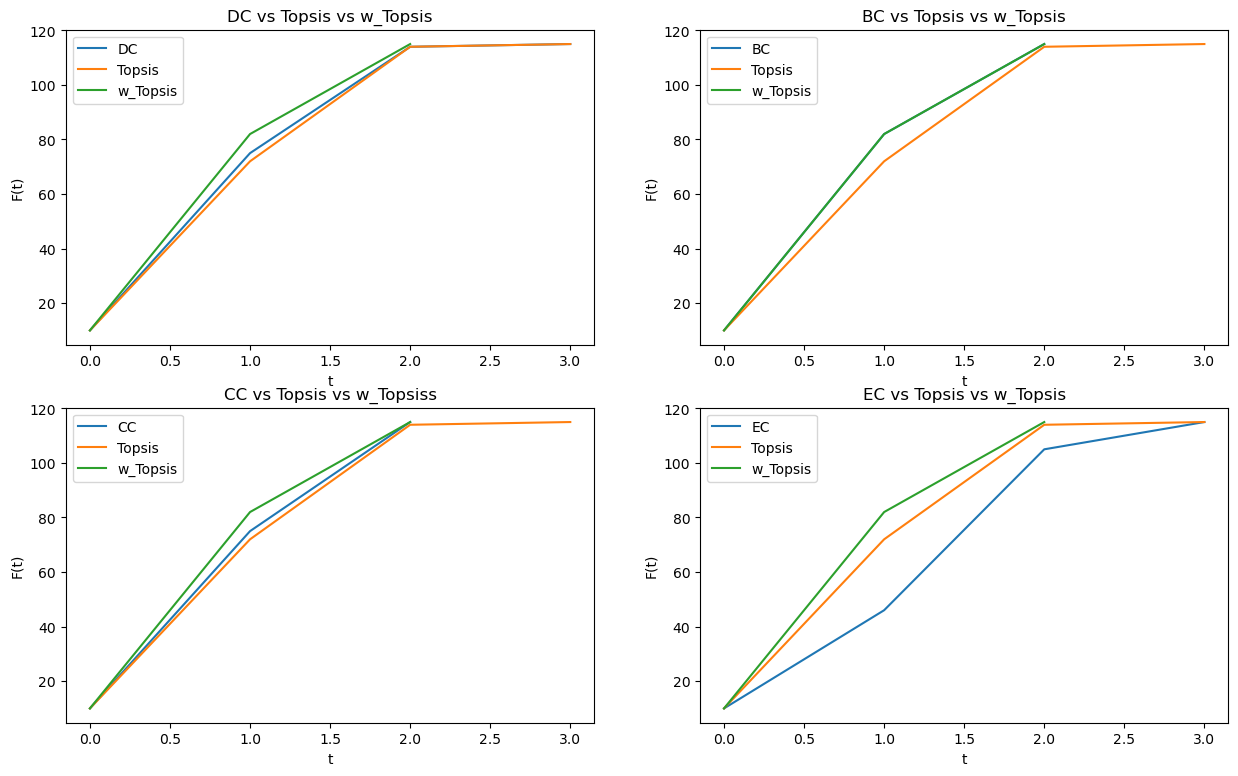

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs[0, 0].plot(Rank_DC['iteration'], Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 0].set_title("DC vs Topsis vs w_Topsis")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC['iteration'], Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 1].set_title("BC vs Topsis vs w_Topsis")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC['iteration'], Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 0].set_title("CC vs Topsis vs w_Topsiss")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC['iteration'], Rank_EC['Nb_infected'], label="EC")
axs[1, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 1].set_title("EC vs Topsis vs w_Topsis")
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')